In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

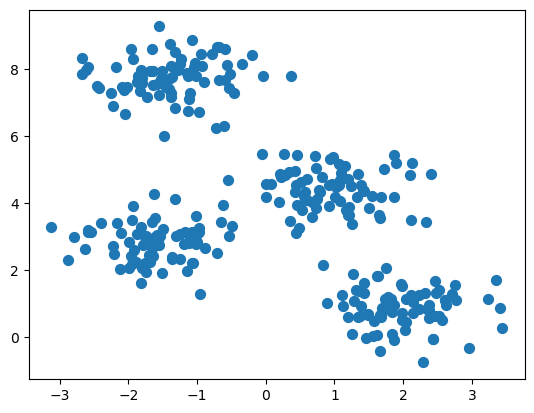

In [7]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate data
X, y_true = make_blobs(
    n_samples=300,
    centers=4,
    cluster_std=0.60,
    random_state=0
)

# Plot points
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.show()


In [11]:
from sklearn.cluster import KMeans

# Create KMeans model with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)

# Fit the model
kmeans.fit(X)

# Predict cluster labels
y_kmeans = kmeans.predict(X)


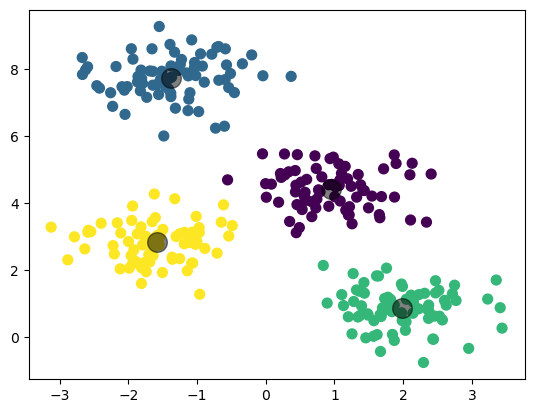

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin

# Custom K-Means function
def find_cluster(X, n_clusters, rseed=2):
    rng = np.random.RandomState(rseed)

    # Choose random initial centers
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)

        # Recompute centers
        new_centers = np.array([
            X[labels == j].mean(axis=0)
            for j in range(n_clusters)
        ])

        # Stop if centers do not change
        if np.all(centers == new_centers):
            break

        centers = new_centers

    return centers, labels


# Run custom clustering
centers, labels = find_cluster(X, 4)

# Plot data points
plt.scatter(X[:, 0], X[:, 1], s=50, c=labels, cmap='viridis')

# Plot cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.show()


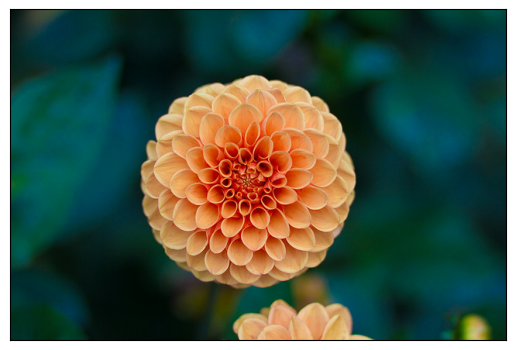

In [19]:
from sklearn.datasets import load_sample_image
china=load_sample_image('flower.jpg')
ax=plt.axes(xticks=[],yticks=[])
ax.imshow(china)

In [21]:
china.shape

(427, 640, 3)

In [23]:
data=china/255.0
data=data.reshape(427*640,3)
data.shape

(273280, 3)

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    ax[0].scatter(R, G, c=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
    
    ax[1].scatter(R, B, c=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
    
    fig.suptitle(title, size=20)
    plt.show()


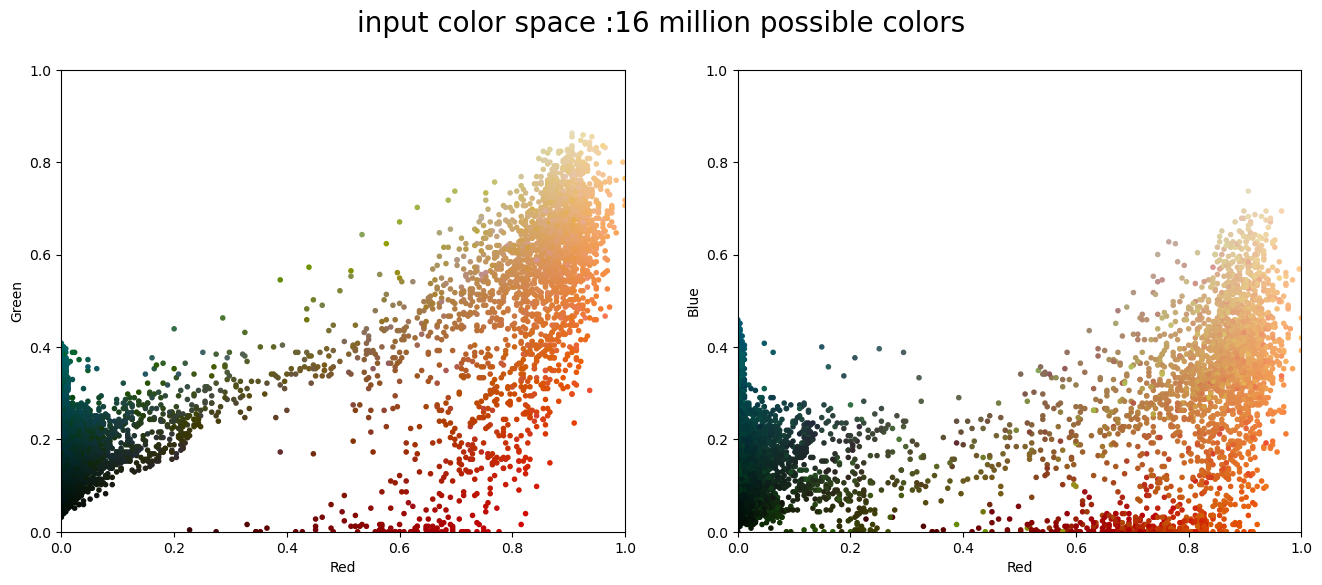

In [33]:
plot_pixels(data,title="input color space :16 million possible colors")

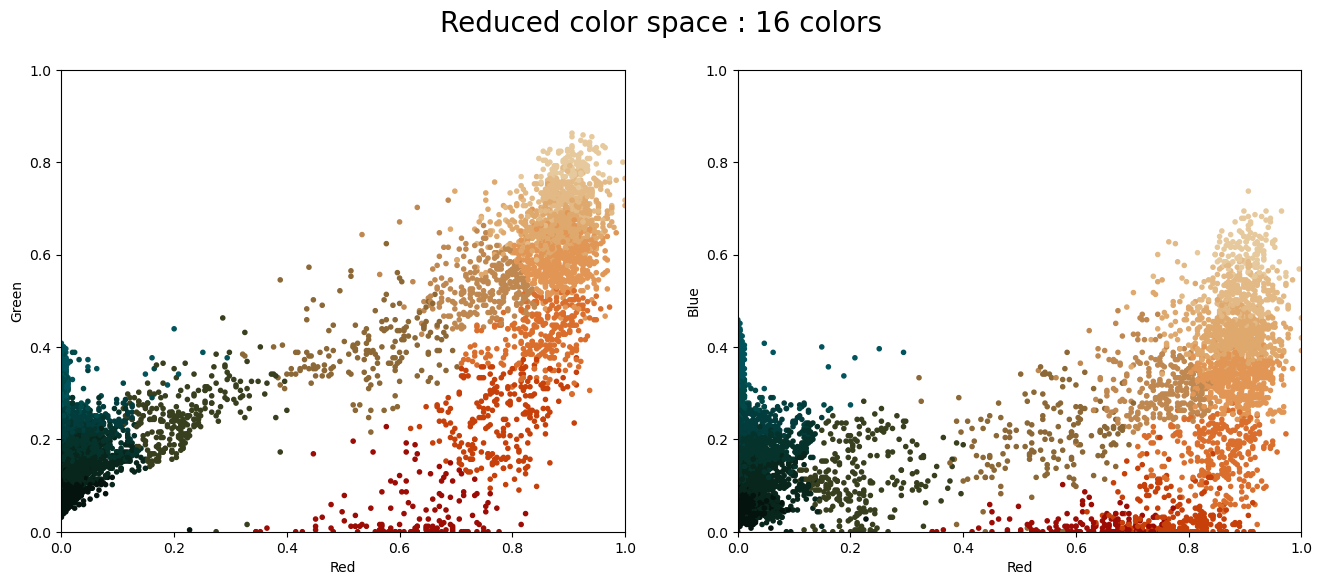

In [37]:
import warnings
warnings.simplefilter('ignore')

from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(16)
kmeans.fit(data)

new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(
    data,
    colors=new_colors,
    title="Reduced color space : 16 colors"
)


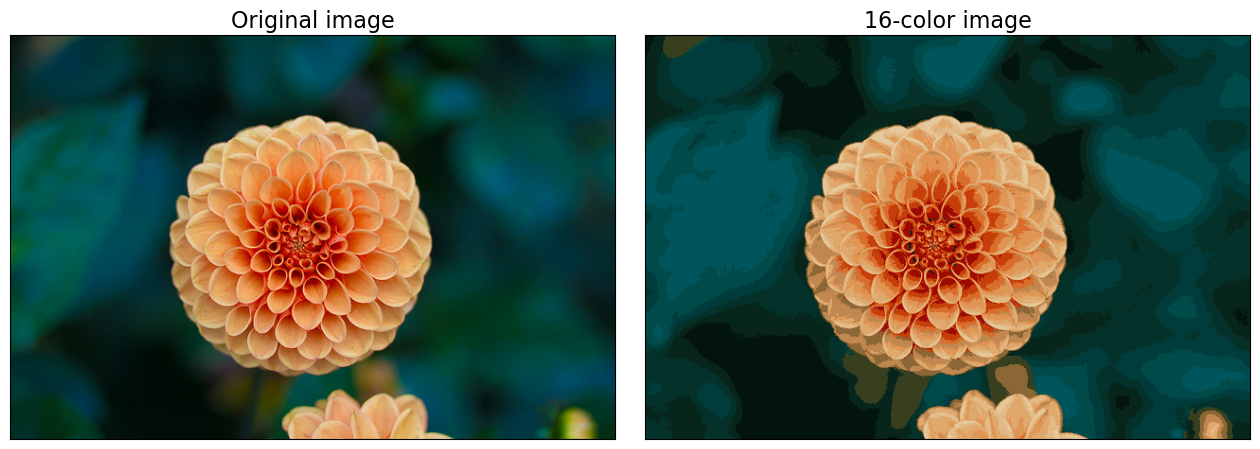

In [43]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(
    1, 2,
    figsize=(16, 6),
    subplot_kw={'xticks': [], 'yticks': []}
)

fig.subplots_adjust(wspace=0.05)

ax[0].imshow(china)
ax[0].set_title('Original image', size=16)

ax[1].imshow(china_recolored)
ax[1].set_title("16-color image", size=16)

plt.show()
